**Problem Statement**

For the business, absenteeism means a loss of production and high-quality work. If organization can somehow predict the amount of time employee are to remain absent, It can help businesses plan tasks effectively to maximize productivity and prevent stressful situations for the business and its personnel.



**Data Source**

UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).



**Brief Description**

1. Absenteeism leads to loss of productive work leading to direct loss of the business of a company. Absenteeism can be due to medical reasons, personal reasons or unforeseen circumstances. The dataset is of a courier company.


2. In this project we will attempt to predict the no of hours an employee can remain absent during worktime; it will aid organizations in figuring out the ways to reduce absenteeism time of employees and also help them get the loss they would make due to employee being absent from work.


3. Dataset that we are going to use contains 740 entries and is heavily skewed, so it would require a great deal to preprocessing, sampling before we could apply any of the data mining algorithm to it.


4. Dataset has 21 attributes pertaining to employee medical history, family conditions, workload, financial conditions etc.



**Team Members**

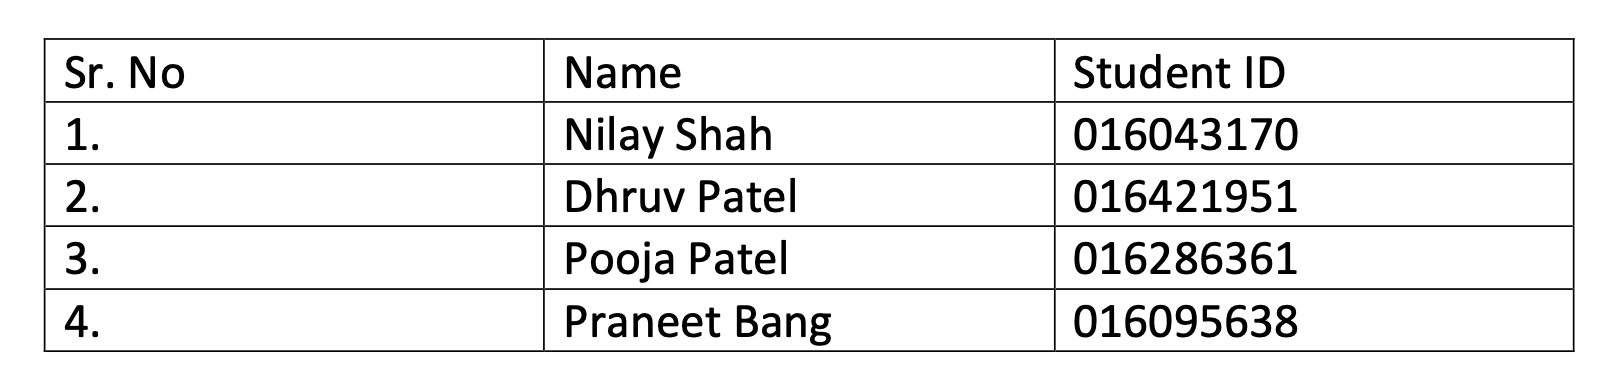



**Task**

Importing the data, the data file is xls file we will import it as .csv file into pandas dataframe.

In [136]:
#initiate a pydrive client to make secure connection to google-drive and access the data
!pip install PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
#File Access Url -- #https://docs.google.com/spreadsheets/d/11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN/edit?usp=sharing&ouid=114733957030923857297&rtpof=true&sd=true.
#File Id -- 11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN.

#making connection to google drive to access the data set file.
dataurl = 'https://docs.google.com/spreadsheets/d/11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN/edit?usp=sharing&ouid=114733957030923857297&rtpof=true&sd=true'

#authenticater and create a pydrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
google_drive = GoogleDrive(gauth)

#get the dataset file.
downloadedfile = google_drive.CreateFile({'id':"11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN"})  #id is present in the link.
downloadedfile.GetContentFile('Absenteeism_at_work.xls') #access the file with name.

#Import All Libraries below.

**Section-1**

1. Data Exploration and Visualization




In [138]:
#Importing required libraries for data visualization.
import pandas as pd					
import numpy as np					

import seaborn as sns				
import matplotlib.pyplot as plt		
%matplotlib inline


In [139]:
##read the data into "absent_data" pandas data frame 
absent_data = pd.read_excel("Absenteeism_at_work.xls")
#absent_data = pd.read_excel("Absenteeism_at_work.xlsx")



In [140]:
#print the data head
absent_data.head(15)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,NaN,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,NaN,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3.0,23.0,7.0,6.0,1.0,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20.0,23.0,7.0,6.0,1.0,NaN,50.0,11.0,36.0,239554.0,...,NaN,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [141]:
#statistics about the data
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,736.000000,737.000000,737.000000,730.000000,...,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,737.00000,734.000000,731.000000,728.000000
mean,18.017568,19.230665,6.316644,3.914865,2.544595,221.218281,29.605978,12.559023,36.398915,271609.242466,...,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.02578,172.092643,26.688098,6.980769
std,11.021247,8.440874,3.432253,1.421675,1.111831,66.777780,14.818895,4.388672,6.422904,39174.793581,...,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.88750,5.993368,4.298915,13.430330
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.00000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.00000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.00000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.00000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.00000,196.000000,38.000000,120.000000


In [142]:
#Information about the data types of each col in the dataset
absent_data.info()

#Below data represents the Non-Null entries in each of the 21 Columns, We can see
# that there are Null Values which need to be imputed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  736 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [143]:
#Shape of the data
# data has 740 rows and 21  
print("Shape of the pandas data is {}" . format(absent_data.shape))

Shape of the pandas data is (740, 21)


In [144]:
#print the total Columns
print("Total Columns" , absent_data.columns)
print("-"*80)
print("Total number of Columns is : {}" .format(len(absent_data.columns)))

Total Columns Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
--------------------------------------------------------------------------------
Total number of Columns is : 21


#Final Data Shape
The data contains **740** data points and **21** features.


In [145]:
#Finding the missing values percentasge
absent_data.isna().sum()
Missing_Value = pd.DataFrame((absent_data.isna().sum()/len(absent_data)*100))

Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value


,Missing_percentage
Absenteeism time in hours,1.621622
Work load Average/day,1.351351
Body mass index,1.216216
Transportation expense,0.945946
Height,0.810811
Education,0.810811
Disciplinary failure,0.810811
Hit target,0.810811
Social drinker,0.675676
Distance from Residence to Work,0.540541


In [146]:
#ID, Day fo the week, Seasons shlould be int and is float convert it to int64
absent_data['ID'] = absent_data['ID'].astype('int')
absent_data['Day of the week'] = absent_data['Day of the week'].astype('int')
absent_data['Seasons'] = absent_data['Seasons'].astype('int')
absent_data['Work load Average/day '] = absent_data['Work load Average/day '].astype('object')


As we can see Column "Work load Average/day " contains extra space at the end so we need to rename the column.

In [147]:
absent_data.rename(columns = {'Work load Average/day ':'Work load Average/day'}, inplace = True)
absent_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  736 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [148]:
#Printing total amount of Null values in all the columns
absent_data.isnull().sum()



ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              3
Height                              6
Body mass index                     9
Absenteeism time in hours          12
dtype: int64

##Dealing With Missing Values in Column "Reason for absence"

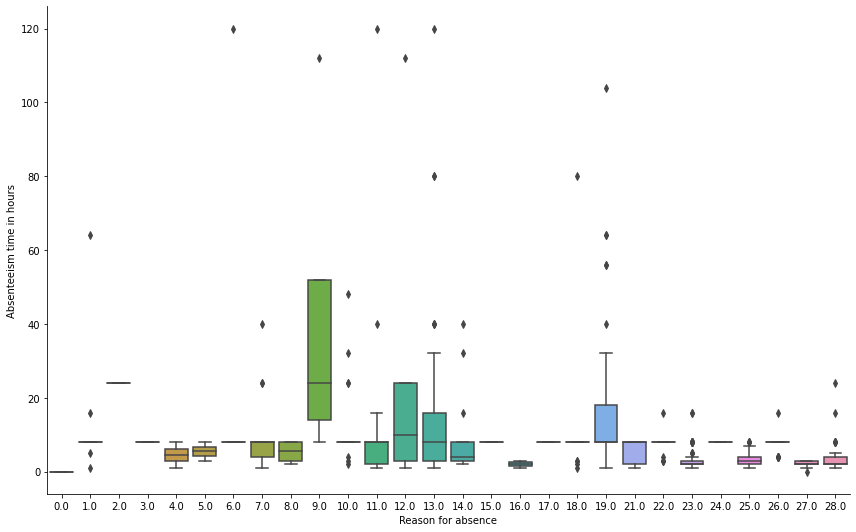

In [149]:
#printCategory plot for Reason of absence and Abseetism time in hours.
# we will print the co-relation between Reson for absence and Abseetidm time in hours.
sns.catplot(x='Reason for absence', y="Absenteeism time in hours", kind="box", data=absent_data,height=7.5,aspect=12/7.5)


In [150]:
print(absent_data[absent_data["Reason for absence"].isnull()])

     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
80    3                 NaN              11.0                5        4   
160  20                 NaN               3.0                4        2   
225   3                 NaN               6.0                2        3   

     Transportation expense  Distance from Residence to Work  Service time  \
80                    179.0                             51.0          18.0   
160                     NaN                             50.0          11.0   
225                   179.0                             51.0          18.0   

      Age Work load Average/day  ...  Disciplinary failure  Education  Son  \
80   38.0              306345.0  ...                   0.0        1.0  0.0   
160  36.0              343253.0  ...                   0.0        1.0  4.0   
225  38.0              377550.0  ...                   0.0        1.0  0.0   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index 

We have 3 Null values in Reason for Absence Column , With Corresponding Abseetism Time in Hours as 8.0 and 1.0 so we will impute missing values using the following logic.

Missing Val in ["Reason for absence"] with Corresponding "Abseentism Time in Hours" = 8.0 or 1.0 impute it with Max("Reason for absence" with value in Abseentism Time in Hours 8.0 or 1.0)

In [151]:
vals = absent_data.where(absent_data["Absenteeism time in hours"] == 8.0)

In [152]:
selected_rows = vals[~vals['ID'].isnull()]
selected_rows

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
10,20.0,1.0,7.0,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
11,20.0,1.0,7.0,3.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
12,20.0,11.0,7.0,4.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,12.0,22.0,6.0,5.0,1.0,233.0,51.0,1.0,31.0,275089.0,...,0.0,2.0,1.0,1.0,0.0,8.0,68.0,178.0,21.0,8.0
727,9.0,6.0,7.0,2.0,1.0,228.0,14.0,16.0,58.0,NaN,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,8.0
732,10.0,22.0,7.0,4.0,1.0,361.0,52.0,3.0,28.0,264604.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
733,28.0,22.0,7.0,4.0,1.0,225.0,26.0,9.0,28.0,264604.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.0


In [153]:
print("Max Values of Column Reason for absence with Abseentism time in hours == 8.0")
print(selected_rows['Reason for absence'].value_counts())

Max Values of Column Reason for absence with Abseentism time in hours == 8.0
22.0    33
26.0    24
13.0    20
19.0    19
10.0    17
18.0    16
1.0     12
23.0    11
11.0     9
28.0     6
14.0     6
6.0      6
7.0      5
25.0     4
24.0     3
21.0     3
8.0      3
15.0     2
17.0     1
4.0      1
3.0      1
5.0      1
9.0      1
Name: Reason for absence, dtype: int64


In [154]:
#As we can see that "22.0" is the maximum reason for absence with Abssentism Hour of 8 hours, we will replace the correspoding
# null values with NaN.
absent_data.loc[(absent_data['Absenteeism time in hours'] == 8.0),'Reason for absence'] = 22.0


In [155]:

vals1 = absent_data.where(absent_data["Absenteeism time in hours"] == 1.0)
selected_rows1 = vals1[~vals1['ID'].isnull()]
selected_rows1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
13,3.0,11.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
21,3.0,11.0,8.0,2.0,1.0,179.0,51.0,18.0,38.0,205917.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
26,11.0,23.0,8.0,3.0,1.0,289.0,36.0,13.0,33.0,205917.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,1.0
35,10.0,23.0,8.0,2.0,1.0,361.0,52.0,3.0,28.0,205917.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,NaN,1.0
59,33.0,23.0,9.0,6.0,4.0,248.0,25.0,14.0,47.0,241476.0,...,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,22.0,13.0,12.0,6.0,4.0,179.0,26.0,9.0,30.0,280549.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0,1.0
679,22.0,13.0,5.0,5.0,3.0,179.0,26.0,9.0,30.0,237656.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0,1.0
687,34.0,28.0,5.0,3.0,3.0,118.0,10.0,10.0,37.0,237656.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,1.0
691,17.0,16.0,5.0,6.0,3.0,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,1.0


In [156]:
print("Max Values of Each Columns with Abseentism time in hours == 1.0")
print(selected_rows1['Reason for absence'].value_counts())

Max Values of Each Columns with Abseentism time in hours == 1.0
23.0    36
28.0    27
13.0     6
11.0     5
27.0     2
19.0     1
12.0     1
18.0     1
7.0      1
25.0     1
4.0      1
1.0      1
21.0     1
16.0     1
Name: Reason for absence, dtype: int64


In [157]:
#As we can see that "22.0" is the maximum reason for absence with Abssentism Hour of 8 hours, we will replace the correspoding
# null values with NaN.
absent_data.loc[(absent_data['Absenteeism time in hours'] == 1.0),'Reason for absence'] = 23.0

In [158]:
absent_data.isnull().sum()
#As we can see that Reason for absence has no missing values now we have imputed the missing values

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              3
Height                              6
Body mass index                     9
Absenteeism time in hours          12
dtype: int64

## Dealing missing values in weight, height and body mass index

In [159]:
weights = absent_data[absent_data['Weight'].isnull()]
weights.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,NaN,170.0,31.0,2.0
212,11,13.0,5.0,4,3,289.0,36.0,13.0,33.0,378884.0,...,0.0,1.0,2.0,1.0,0.0,1.0,NaN,172.0,30.0,24.0
335,20,22.0,11.0,6,4,260.0,50.0,11.0,36.0,284031.0,...,0.0,1.0,4.0,1.0,0.0,0.0,NaN,168.0,23.0,8.0


In [160]:
# we notice that where weight is null, we have body mass index available for the record
# weight = body mass index * (height*height) where height is in metres. Hence we can substitute missing values for the weights with this formula

absent_data['Weight'].fillna(round(absent_data['Body mass index']*((absent_data['Height']**2))/10000), inplace=True)
print(absent_data['Weight'].isnull().sum())
absent_data.iloc[16:17]

0


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,90.0,170.0,31.0,2.0


In [161]:
heights = absent_data[absent_data['Height'].isnull()]
heights.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
319,3,22.0,11.0,3,4,179.0,51.0,18.0,38.0,284031.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,8.0
327,34,11.0,11.0,4,4,118.0,10.0,10.0,37.0,284031.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,NaN,28.0,3.0
487,3,25.0,8.0,2,1,179.0,51.0,18.0,38.0,249797.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,4.0
573,17,25.0,1.0,6,2,179.0,22.0,17.0,40.0,313532.0,...,0.0,2.0,2.0,0.0,1.0,0.0,63.0,NaN,22.0,2.0
659,22,27.0,4.0,6,3,179.0,26.0,9.0,30.0,246288.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,NaN,19.0,2.0


In [162]:
# we notice that where height is null, we have body mass index available for the record
# height = sqrt(weight / body mass index height) where weight is in kg. Hence we can substitute missing values for the heights with this formula.

absent_data['Height'].fillna( round(np.sqrt(absent_data['Weight'] / absent_data['Body mass index'])*100), inplace=True)
absent_data['Height'].isnull().sum()

0

In [163]:
absent_data.iloc[319:320]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
319,3,22.0,11.0,3,4,179.0,51.0,18.0,38.0,284031.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,169.0,31.0,8.0


In [164]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     9
Absenteeism time in hours          12
dtype: int64

In [165]:
# we see that wheverever BMI is null, we have weight and height available. so we can compute bmi based on that, and fill the na values.
bmi = absent_data[absent_data['Body mass index'].isnull()]
bmi

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
12,20,22.0,7.0,4,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,NaN,8.0
35,10,23.0,8.0,2,1,361.0,52.0,3.0,28.0,205917.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,NaN,1.0
101,1,22.0,12.0,4,4,235.0,11.0,14.0,37.0,261306.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,NaN,8.0
111,24,22.0,12.0,6,2,246.0,25.0,16.0,41.0,261306.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,8.0
127,34,27.0,1.0,2,2,118.0,10.0,10.0,37.0,308593.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,NaN,2.0
138,24,22.0,2.0,4,2,246.0,25.0,16.0,41.0,302585.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,8.0
153,28,23.0,2.0,4,2,225.0,26.0,9.0,28.0,302585.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,NaN,1.0
181,28,28.0,3.0,6,3,225.0,26.0,9.0,28.0,343253.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,NaN,2.0
263,36,13.0,8.0,5,1,118.0,13.0,18.0,50.0,265615.0,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,NaN,3.0


In [166]:
absent_data['Body mass index'].fillna(round(absent_data['Weight']/((absent_data['Height']**2)/10000)), inplace=True)

In [167]:
absent_data.iloc[263:264, :]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
263,36,13.0,8.0,5,1,118.0,13.0,18.0,50.0,265615.0,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,3.0


In [168]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing and 0 values in Month column

In [169]:
moa = absent_data[absent_data['Month of absence'].isnull()]
moa

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
104,34,19.0,NaN,3,4,118.0,10.0,10.0,37.0,261306.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,56.0


In [170]:
absent_data['Month of absence'].value_counts()

3.0     87
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
0.0      3
Name: Month of absence, dtype: int64

In [171]:
## replacing null values and 0 values with the mode of the data i.e. 3
absent_data['Month of absence'].fillna( 3, inplace=True)

In [172]:
absent_data['Month of absence'].value_counts()

3.0     88
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
0.0      3
Name: Month of absence, dtype: int64

In [173]:
absent_data['Month of absence'].replace(0, 3, inplace = True)

In [174]:
absent_data['Month of absence'].value_counts()

3.0     91
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
Name: Month of absence, dtype: int64

In [175]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in Transportation expense and Distance from residence to work.
##Expense is proportional to the distance from work

In [176]:
## examining distance from work and expense occurred
distance_expense = absent_data[['ID','Distance from Residence to Work', 'Transportation expense']]
distance_expense.groupby(['Distance from Residence to Work', 'Transportation expense']).size()

Distance from Residence to Work  Transportation expense
5.0                              279.0                       6
10.0                             118.0                      53
11.0                             235.0                      23
                                 268.0                       3
12.0                             155.0                      29
13.0                             118.0                      33
14.0                             118.0                       1
                                 228.0                       8
15.0                             118.0                       2
                                 225.0                       4
                                 388.0                       3
16.0                             235.0                      10
                                 330.0                      16
17.0                             369.0                      15
20.0                             235.0                      19

In [177]:
distance_expense[distance_expense['Transportation expense'].isnull()]

,ID,Distance from Residence to Work,Transportation expense
7,20,50.0,NaN
63,34,10.0,NaN
88,28,26.0,NaN
109,10,52.0,NaN
130,11,36.0,NaN
160,20,50.0,NaN
231,36,13.0,NaN


In [178]:
tmp = distance_expense[distance_expense['Transportation expense'].isnull()]
tmp_list = set(tmp['Distance from Residence to Work'].tolist())
print(tmp_list)

for dist in tmp_list:
  absent_data.loc[(absent_data['Transportation expense'].isnull()) & (absent_data['Distance from Residence to Work']==dist), \
                       'Transportation expense'] = absent_data.loc[absent_data['Distance from Residence to Work']==dist, 'Transportation expense'].mode()[0]


{36.0, 10.0, 13.0, 50.0, 52.0, 26.0}


In [179]:
absent_data.groupby(['Distance from Residence to Work', 'Transportation expense']).size()

Distance from Residence to Work  Transportation expense
5.0                              279.0                       6
10.0                             118.0                      54
11.0                             235.0                      23
                                 268.0                       3
12.0                             155.0                      29
13.0                             118.0                      34
14.0                             118.0                       1
                                 228.0                       8
15.0                             118.0                       2
                                 225.0                       4
                                 388.0                       3
16.0                             235.0                      10
                                 330.0                      16
17.0                             369.0                      15
20.0                             235.0                      19

In [180]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

In [181]:
## examining distance from work and expense occurred
distance_expense = absent_data[['ID','Distance from Residence to Work', 'Transportation expense']]
distance_expense.groupby([  'Transportation expense', 'Distance from Residence to Work']).size()

Transportation expense  Distance from Residence to Work
118.0                   10.0                                54
                        13.0                                34
                        14.0                                 1
                        15.0                                 2
155.0                   12.0                                29
157.0                   27.0                                 7
179.0                   22.0                                20
                        26.0                                45
                        45.0                                 1
                        51.0                               112
184.0                   42.0                                 7
189.0                   29.0                                 8
225.0                   15.0                                 4
                        26.0                                77
228.0                   14.0                                 8

In [182]:
distance_expense[distance_expense['Distance from Residence to Work'].isnull()]

,ID,Distance from Residence to Work,Transportation expense
57,3,NaN,179.0
166,20,NaN,260.0
707,22,NaN,179.0
722,34,NaN,118.0


In [183]:
tmp = distance_expense[distance_expense['Distance from Residence to Work'].isnull()]
tmp_list = set(tmp['Transportation expense'].tolist())
print(tmp_list)

for exp in tmp_list:
  absent_data.loc[(absent_data['Distance from Residence to Work'].isnull()) & (absent_data['Transportation expense']==exp),'Distance from Residence to Work'] = \
  absent_data.loc[absent_data['Transportation expense']==exp, 'Distance from Residence to Work'].mode()[0]

{179.0, 260.0, 118.0}


In [184]:
absent_data.groupby(['Transportation expense', 'Distance from Residence to Work']).size()

Transportation expense  Distance from Residence to Work
118.0                   10.0                                55
                        13.0                                34
                        14.0                                 1
                        15.0                                 2
155.0                   12.0                                29
157.0                   27.0                                 7
179.0                   22.0                                20
                        26.0                                45
                        45.0                                 1
                        51.0                               114
184.0                   42.0                                 7
189.0                   29.0                                 8
225.0                   15.0                                 4
                        26.0                                77
228.0                   14.0                                 8

In [185]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in Service time column

In [186]:
service_time = absent_data[absent_data['Service time'].isnull()]
service_time

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
3,7,7.0,7.0,5,1,279.0,5.0,NaN,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
18,6,22.0,7.0,5,1,189.0,29.0,NaN,33.0,239554.0,...,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0
137,27,23.0,2.0,6,2,184.0,42.0,NaN,27.0,302585.0,...,0.0,1.0,NaN,0.0,0.0,0.0,58.0,167.0,21.0,1.0


In [187]:
absent_data.groupby(['ID', 'Service time']).size()

ID  Service time
1   14.0             23
2   12.0              6
3   18.0            113
4   13.0              1
5   13.0             19
6   13.0              7
7   14.0              5
8   14.0              2
9   16.0              8
10  3.0              24
11  13.0             40
12  1.0               7
13  12.0             15
14  14.0             29
15  12.0             37
16  24.0              2
17  17.0             20
18  4.0              16
19  12.0              3
20  11.0             42
21  8.0               3
22  9.0              46
23  11.0              8
24  16.0             30
25  8.0              10
26  13.0              5
27  7.0               6
28  9.0              76
29  9.0               1
    15.0              4
30  6.0               7
31  9.0               3
32  29.0              5
33  14.0             24
34  10.0             55
35  14.0              1
36  18.0             34
dtype: int64

In [188]:
tmp_list = absent_data.loc[absent_data['Service time'].isnull(), 'ID'].tolist()
tmp_list = set(tmp_list)
print(tmp_list)

for id in tmp_list:
  absent_data.loc[(absent_data['Service time'].isnull()) & (absent_data['ID']==id),'Service time'] = \
  absent_data.loc[absent_data['ID']==id, 'Service time'].mode()[0]


{27, 6, 7}


In [189]:
absent_data.groupby(['ID', 'Service time']).size()

ID  Service time
1   14.0             23
2   12.0              6
3   18.0            113
4   13.0              1
5   13.0             19
6   13.0              8
7   14.0              6
8   14.0              2
9   16.0              8
10  3.0              24
11  13.0             40
12  1.0               7
13  12.0             15
14  14.0             29
15  12.0             37
16  24.0              2
17  17.0             20
18  4.0              16
19  12.0              3
20  11.0             42
21  8.0               3
22  9.0              46
23  11.0              8
24  16.0             30
25  8.0              10
26  13.0              5
27  7.0               7
28  9.0              76
29  9.0               1
    15.0              4
30  6.0               7
31  9.0               3
32  29.0              5
33  14.0             24
34  10.0             55
35  14.0              1
36  18.0             34
dtype: int64

In [190]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in the age column

In [191]:
absent_data[absent_data['Age'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
144,31,22.0,2.0,2,2,388.0,15.0,9.0,NaN,302585.0,...,0.0,1.0,0.0,0.0,0.0,0.0,76.0,178.0,24.0,8.0
276,8,0.0,9.0,3,1,231.0,35.0,14.0,NaN,294217.0,...,1.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
729,9,6.0,7.0,3,1,228.0,14.0,16.0,NaN,264604.0,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,120.0


###Age is null for ids: 8, 9, 31.
###Lets examine if age is populated against these ids for other rows.

In [192]:
absent_data[['ID', 'Age']].groupby(['ID', 'Age']).size()

ID  Age 
1   37.0     23
2   48.0      6
3   38.0    113
4   40.0      1
5   43.0     19
6   33.0      8
7   39.0      6
8   39.0      1
9   58.0      7
10  28.0     24
11  33.0     40
12  31.0      7
13  31.0     15
14  34.0     29
15  40.0     37
16  46.0      2
17  40.0     20
18  28.0     16
19  32.0      3
20  36.0     42
21  33.0      3
22  30.0     46
23  36.0      8
24  41.0     30
25  32.0     10
26  43.0      5
27  27.0      7
28  28.0     76
29  28.0      1
    41.0      4
30  29.0      7
31  50.0      2
32  49.0      5
33  47.0     24
34  37.0     55
35  53.0      1
36  50.0     34
dtype: int64

###We see that the non-null age for IDs: 8, 9 and 31 is 39, 58 and 50. Thus we can impute these values against these ids, for the missing records.

In [193]:
ids = absent_data.loc[absent_data['Age'].isnull(), 'ID'].tolist()
ids = set(ids)
print(ids)

{8, 9, 31}


In [194]:
for id in ids:
  absent_data.loc[(absent_data['Age'].isnull()) & (absent_data['ID']==id),'Age'] = \
  absent_data.loc[absent_data['ID']==id, 'Age'].mode()[0]


In [195]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in Disciplinary failure column

In [196]:
absent_data['Disciplinary failure'].value_counts()

0.0    695
1.0     39
Name: Disciplinary failure, dtype: int64

###The mode is 0 by a huge margin, so we can impute the missing values with 0

In [197]:
absent_data['Disciplinary failure'].fillna(0, inplace=True)

In [198]:
absent_data['Disciplinary failure'].value_counts()

0.0    701
1.0     39
Name: Disciplinary failure, dtype: int64

In [199]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in Education column

In [200]:
edu = absent_data[absent_data['Education'].isnull()]

In [201]:
ids = absent_data.loc[absent_data['Education'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{10, 11, 20, 22, 28, 33}

In [202]:
for id in ids:
  absent_data.loc[(absent_data['Education'].isnull()) & (absent_data['ID']==id),'Education'] = \
  absent_data.loc[absent_data['ID']==id, 'Education'].mode()[0]

In [203]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in Son column

In [204]:
absent_data[absent_data['Son'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
124,34,27.0,1.0,4,2,118.0,10.0,10.0,37.0,308593.0,...,0.0,1.0,NaN,0.0,0.0,0.0,83.0,172.0,28.0,2.0
137,27,23.0,2.0,6,2,184.0,42.0,7.0,27.0,302585.0,...,0.0,1.0,NaN,0.0,0.0,0.0,58.0,167.0,21.0,1.0
155,19,28.0,3.0,3,2,291.0,50.0,12.0,32.0,343253.0,...,0.0,1.0,NaN,1.0,0.0,0.0,65.0,169.0,23.0,2.0
198,11,22.0,4.0,3,3,289.0,36.0,13.0,33.0,326452.0,...,0.0,1.0,NaN,1.0,0.0,1.0,90.0,172.0,30.0,8.0


In [205]:
ids = absent_data.loc[absent_data['Son'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{11, 19, 27, 34}

In [206]:
for id in ids:
  absent_data.loc[(absent_data['Son'].isnull()) & (absent_data['ID']==id),'Son'] = \
  absent_data.loc[absent_data['ID']==id, 'Son'].mode()[0]

In [207]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in the Social drinker column

In [208]:
absent_data[absent_data['Social drinker'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
141,6,22.0,2.0,5,2,189.0,29.0,13.0,33.0,302585.0,...,0.0,1.0,2.0,NaN,0.0,2.0,69.0,167.0,25.0,8.0
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,294217.0,...,0.0,1.0,2.0,NaN,0.0,1.0,90.0,172.0,30.0,24.0
280,3,23.0,9.0,5,1,179.0,51.0,18.0,38.0,294217.0,...,0.0,1.0,0.0,NaN,0.0,0.0,89.0,170.0,31.0,1.0
382,24,23.0,2.0,3,2,246.0,25.0,16.0,41.0,251818.0,...,0.0,1.0,0.0,NaN,0.0,0.0,67.0,170.0,23.0,2.0
400,13,0.0,3.0,4,2,369.0,17.0,12.0,31.0,244387.0,...,1.0,1.0,3.0,NaN,0.0,0.0,70.0,169.0,25.0,0.0


In [209]:
absent_data[['ID', 'Social drinker']].groupby(['ID', 'Social drinker']).size()

ID  Social drinker
1   0.0                23
2   0.0                 6
3   1.0               112
4   1.0                 1
5   1.0                19
6   0.0                 7
7   1.0                 6
8   1.0                 2
9   0.0                 8
10  1.0                24
11  1.0                39
12  1.0                 7
13  1.0                14
14  1.0                29
15  1.0                37
16  1.0                 2
17  0.0                20
18  0.0                16
19  1.0                 3
20  1.0                42
21  0.0                 3
22  0.0                46
23  0.0                 8
24  1.0                29
25  0.0                10
26  1.0                 5
27  0.0                 7
28  0.0                76
29  0.0                 1
    1.0                 4
30  1.0                 7
31  0.0                 3
32  0.0                 5
33  0.0                24
34  0.0                55
35  0.0                 1
36  1.0                34
dtype: int64

In [210]:
ids = absent_data.loc[absent_data['Social drinker'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{3, 6, 11, 13, 24}

In [211]:
for id in ids:
  absent_data.loc[(absent_data['Social drinker'].isnull()) & (absent_data['ID']==id),'Social drinker'] = \
  absent_data.loc[absent_data['ID']==id, 'Social drinker'].mode()[0]

In [212]:
absent_data[['ID', 'Social drinker']].groupby(['ID', 'Social drinker']).size()

ID  Social drinker
1   0.0                23
2   0.0                 6
3   1.0               113
4   1.0                 1
5   1.0                19
6   0.0                 8
7   1.0                 6
8   1.0                 2
9   0.0                 8
10  1.0                24
11  1.0                40
12  1.0                 7
13  1.0                15
14  1.0                29
15  1.0                37
16  1.0                 2
17  0.0                20
18  0.0                16
19  1.0                 3
20  1.0                42
21  0.0                 3
22  0.0                46
23  0.0                 8
24  1.0                30
25  0.0                10
26  1.0                 5
27  0.0                 7
28  0.0                76
29  0.0                 1
    1.0                 4
30  1.0                 7
31  0.0                 3
32  0.0                 5
33  0.0                24
34  0.0                55
35  0.0                 1
36  1.0                34
dtype: int64

In [213]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in the Social Smoker column

In [214]:
absent_data[absent_data['Social smoker'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,90.0,170.0,31.0,2.0
29,3,23.0,8.0,6,1,179.0,51.0,18.0,38.0,205917.0,...,0.0,1.0,0.0,1.0,NaN,0.0,89.0,170.0,31.0,2.0
41,34,23.0,9.0,2,1,118.0,10.0,10.0,37.0,241476.0,...,0.0,1.0,0.0,0.0,NaN,0.0,83.0,172.0,28.0,4.0


In [215]:
absent_data[['ID', 'Social smoker']].groupby(['ID', 'Social smoker']).size()

ID  Social smoker
1   0.0               23
2   1.0                6
3   0.0              111
4   0.0                1
5   0.0               19
6   0.0                8
7   1.0                6
8   0.0                2
9   0.0                8
10  0.0               24
11  0.0               40
12  0.0                7
13  0.0               15
14  0.0               29
15  0.0               37
16  1.0                2
17  1.0               20
18  0.0               16
19  0.0                3
20  0.0               42
21  0.0                3
22  0.0               46
23  1.0                8
24  0.0               30
25  0.0               10
26  1.0                5
27  0.0                7
28  0.0               76
29  0.0                5
30  1.0                7
31  0.0                3
32  0.0                5
33  0.0               24
34  0.0               54
35  0.0                1
36  0.0               34
dtype: int64

In [216]:
ids = absent_data.loc[absent_data['Social smoker'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{3, 34}

In [217]:
for id in ids:
  absent_data.loc[(absent_data['Social smoker'].isnull()) & (absent_data['ID']==id),'Social smoker'] = \
  absent_data.loc[absent_data['ID']==id, 'Social smoker'].mode()[0]

In [218]:
absent_data[['ID', 'Social smoker']].groupby(['ID', 'Social smoker']).size()

ID  Social smoker
1   0.0               23
2   1.0                6
3   0.0              113
4   0.0                1
5   0.0               19
6   0.0                8
7   1.0                6
8   0.0                2
9   0.0                8
10  0.0               24
11  0.0               40
12  0.0                7
13  0.0               15
14  0.0               29
15  0.0               37
16  1.0                2
17  1.0               20
18  0.0               16
19  0.0                3
20  0.0               42
21  0.0                3
22  0.0               46
23  1.0                8
24  0.0               30
25  0.0               10
26  1.0                5
27  0.0                7
28  0.0               76
29  0.0                5
30  1.0                7
31  0.0                3
32  0.0                5
33  0.0               24
34  0.0               55
35  0.0                1
36  0.0               34
dtype: int64

In [219]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in the Pet column

In [220]:
absent_data[absent_data['Pet'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
645,3,27.0,3.0,6,2,179.0,51.0,18.0,38.0,222196.0,...,0.0,1.0,0.0,1.0,0.0,NaN,89.0,170.0,31.0,3.0
691,17,23.0,5.0,6,3,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,1.0
703,17,22.0,5.0,6,3,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,8.0
714,2,0.0,6.0,2,3,235.0,29.0,12.0,48.0,275089.0,...,1.0,1.0,1.0,0.0,1.0,NaN,88.0,163.0,33.0,0.0


In [221]:
absent_data[['ID', 'Pet']].groupby(['ID', 'Pet']).size()

ID  Pet
1   1.0     23
2   5.0      5
3   0.0    112
4   8.0      1
5   0.0     19
6   2.0      8
7   0.0      6
8   2.0      2
9   1.0      8
10  4.0     24
11  1.0     40
12  8.0      7
13  0.0     15
14  0.0     29
15  1.0     37
16  0.0      2
17  0.0     18
18  0.0     16
19  0.0      3
20  0.0     42
21  0.0      3
22  0.0     46
23  4.0      8
24  0.0     30
25  0.0     10
26  1.0      5
27  0.0      7
28  2.0     76
29  2.0      5
30  0.0      7
31  0.0      3
32  2.0      5
33  1.0     24
34  0.0     55
35  1.0      1
36  0.0     34
dtype: int64

In [222]:
ids = absent_data.loc[absent_data['Pet'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{2, 3, 17}

In [223]:
for id in ids:
  absent_data.loc[(absent_data['Pet'].isnull()) & (absent_data['ID']==id),'Pet'] = \
  absent_data.loc[absent_data['ID']==id, 'Pet'].mode()[0]

In [224]:
absent_data[['ID', 'Pet']].groupby(['ID', 'Pet']).size()

ID  Pet
1   1.0     23
2   5.0      6
3   0.0    113
4   8.0      1
5   0.0     19
6   2.0      8
7   0.0      6
8   2.0      2
9   1.0      8
10  4.0     24
11  1.0     40
12  8.0      7
13  0.0     15
14  0.0     29
15  1.0     37
16  0.0      2
17  0.0     20
18  0.0     16
19  0.0      3
20  0.0     42
21  0.0      3
22  0.0     46
23  4.0      8
24  0.0     30
25  0.0     10
26  1.0      5
27  0.0      7
28  2.0     76
29  2.0      5
30  0.0      7
31  0.0      3
32  2.0      5
33  1.0     24
34  0.0     55
35  1.0      1
36  0.0     34
dtype: int64

In [225]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          12
dtype: int64

##Dealing with missing values in the Absenteeism column
###Missing values can be imputed based on Reason for absence

In [226]:
absent_data[absent_data['Absenteeism time in hours'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
238,34,5.0,7.0,6,1,118.0,10.0,10.0,37.0,275312.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,NaN
254,11,23.0,8.0,2,1,289.0,36.0,13.0,33.0,265615.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,NaN
296,34,7.0,10.0,2,4,118.0,10.0,10.0,37.0,265017.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,NaN
351,3,28.0,12.0,6,4,179.0,51.0,18.0,38.0,236629.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
401,1,21.0,3.0,5,2,235.0,11.0,14.0,37.0,244387.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,NaN
445,20,28.0,6.0,6,3,260.0,50.0,11.0,36.0,253957.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,NaN
526,28,10.0,10.0,6,4,225.0,26.0,9.0,28.0,284853.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,NaN
599,28,25.0,2.0,5,2,225.0,26.0,9.0,28.0,264249.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,NaN
649,3,27.0,3.0,4,3,179.0,51.0,18.0,38.0,222196.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
680,15,28.0,5.0,5,3,291.0,31.0,12.0,40.0,237656.0,...,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,NaN


In [227]:
print(absent_data[['Reason for absence', 'Absenteeism time in hours']].groupby(['Reason for absence', 'Absenteeism time in hours']).size())

Reason for absence  Absenteeism time in hours
0.0                 0.0                          43
1.0                 5.0                           1
                    16.0                          1
                    64.0                          1
2.0                 24.0                          1
                                                 ..
28.0                3.0                          20
                    4.0                          21
                    5.0                           1
                    16.0                          1
                    24.0                          1
Length: 90, dtype: int64


In [228]:
rfa = absent_data.loc[absent_data['Absenteeism time in hours'].isnull(), 'Reason for absence'].tolist()
rfa = set(rfa)
rfa

{5.0, 6.0, 7.0, 10.0, 21.0, 23.0, 25.0, 27.0, 28.0}

In [229]:
for reason in rfa:
  x = absent_data[absent_data['Reason for absence'] == reason]
  print(x[['Reason for absence', 'Absenteeism time in hours']].groupby(['Reason for absence', 'Absenteeism time in hours']).size())
  print()

Reason for absence  Absenteeism time in hours
5.0                 3.0                          1
dtype: int64

Reason for absence  Absenteeism time in hours
6.0                 120.0                        1
dtype: int64

Reason for absence  Absenteeism time in hours
7.0                 2.0                          1
                    3.0                          1
                    4.0                          2
                    5.0                          1
                    24.0                         2
                    40.0                         1
dtype: int64

Reason for absence  Absenteeism time in hours
10.0                2.0                          1
                    3.0                          1
                    4.0                          1
                    24.0                         2
                    32.0                         1
                    48.0                         1
dtype: int64

Reason for absence  Absenteeism time in hours


In [230]:
for reason in rfa:
  print('reason for absence: ', reason)
  x = absent_data[absent_data['Reason for absence'] == reason]
  print('median: ', x['Absenteeism time in hours'].median(), 'mean: ', x[ 'Absenteeism time in hours'].mean())
  print()

reason for absence:  5.0
median:  3.0 mean:  3.0

reason for absence:  6.0
median:  120.0 mean:  120.0

reason for absence:  7.0
median:  4.5 mean:  13.25

reason for absence:  10.0
median:  24.0 mean:  19.571428571428573

reason for absence:  21.0
median:  2.0 mean:  2.0

reason for absence:  23.0
median:  2.0 mean:  2.064516129032258

reason for absence:  25.0
median:  3.0 mean:  2.88

reason for absence:  27.0
median:  2.0 mean:  2.292307692307692

reason for absence:  28.0
median:  3.0 mean:  3.3289473684210527



###Median and mean for all reasons of absence are similar except for reasons of absence 7 and 10. Median is a better measure for those cases, hence, imputing all missing values with the median

In [231]:
for reason in rfa:
  x = absent_data[absent_data['Reason for absence'] == reason]
  absent_data.loc[(absent_data['Absenteeism time in hours'].isnull()) & (absent_data['Reason for absence']==reason),'Absenteeism time in hours'] = \
  x['Absenteeism time in hours'].median()

In [232]:
for reason in rfa:
  x = absent_data[absent_data['Reason for absence'] == reason]
  print(x[['Reason for absence', 'Absenteeism time in hours']].groupby(['Reason for absence', 'Absenteeism time in hours']).size())
  print()

Reason for absence  Absenteeism time in hours
5.0                 3.0                          2
dtype: int64

Reason for absence  Absenteeism time in hours
6.0                 120.0                        2
dtype: int64

Reason for absence  Absenteeism time in hours
7.0                 2.0                          1
                    3.0                          1
                    4.0                          2
                    4.5                          1
                    5.0                          1
                    24.0                         2
                    40.0                         1
dtype: int64

Reason for absence  Absenteeism time in hours
10.0                2.0                          1
                    3.0                          1
                    4.0                          1
                    24.0                         3
                    32.0                         1
                    48.0                         1
dtype: in

In [233]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

##Dealing with missing values in the Work load Average/day column
### 'Work load Average/day' values are dependent upon 'Month of absence' and 'Hit target' values

In [234]:
absent_data['Work load Average/day'] = absent_data['Work load Average/day'].astype(float)

In [235]:
absent_data['Work load Average/day'].head()

0    239554.0
1    239554.0
2    239554.0
3    239554.0
4    239554.0
Name: Work load Average/day, dtype: float64

In [236]:
absent_data[absent_data['Work load Average/day'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
194,24,22.0,4.0,6,3,246.0,25.0,16.0,41.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,23.0,8.0
447,15,13.0,6.0,2,3,291.0,31.0,12.0,40.0,NaN,...,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,40.0
455,3,22.0,6.0,4,1,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
512,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
568,28,23.0,12.0,2,4,225.0,26.0,9.0,28.0,NaN,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
593,3,27.0,2.0,6,2,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
650,3,27.0,3.0,5,3,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
678,5,22.0,5.0,4,3,235.0,20.0,13.0,43.0,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,106.0,167.0,38.0,8.0
727,9,22.0,7.0,2,1,228.0,14.0,16.0,58.0,NaN,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,8.0


In [237]:
month_ht = absent_data[absent_data['Work load Average/day'] != '']
month_ht[['Month of absence', 'Hit target', 'Work load Average/day']].groupby(['Month of absence', 'Hit target', 'Work load Average/day']).size()

Month of absence  Hit target  Work load Average/day
1.0               95.0        308593.0                 24
                  96.0        313532.0                 15
                  100.0       330061.0                 11
2.0               96.0        251818.0                 21
                  97.0        264249.0                 32
                  99.0        302585.0                 18
3.0               95.0        271219.0                  3
                              343253.0                 29
                  97.0        261306.0                  1
                  98.0        244387.0                 22
                  99.0        222196.0                 35
4.0               91.0        246288.0                 20
                  96.0        326452.0                 19
                  98.0        239409.0                 13
5.0               92.0        378884.0                 16
                  99.0        237656.0                 31
                    

In [238]:
month_ht = absent_data[absent_data['Work load Average/day'] != '']
month_ht[['Month of absence', 'Hit target', 'ID']].groupby(['Month of absence', 'Hit target']).count()

ID
Month of absence Hit target    
1.0              95.0        24
                 96.0        15
                 100.0       11
2.0              96.0        21
                 97.0        33
                 99.0        18
3.0              95.0        32
                 97.0         1
                 98.0        22
                 99.0        36
4.0              91.0        20
                 96.0        20
                 98.0        13
5.0              92.0        16
                 99.0        48
6.0              94.0        16
                 95.0        19
                 96.0        19
7.0              92.0        20
                 93.0        12
                 97.0        16
                 98.0        16
8.0              92.0        21
                 93.0        15
                 94.0        18
9.0              81.0        19
                 87.0        12
                 92.0        22
10.0             88.0        28
                 91.0        25
                 93.0        17
11.0             93.0        40
                 97.0        22
12.0             93.0        19
                 97.0        13
                 98.0        15

Thus, we can see that using 'Month of absence' and 'Hit target' columns, we can impute the 'Work load Average/day' as the value remains same for a specific 'Month of absence' and 'Hit target' value.

In [239]:
ids = absent_data.loc[absent_data['Work load Average/day'].isnull(), 'ID'].tolist()
ids = list(set(ids))
print(ids)
tmp = []

for id in ids:
  x = absent_data.loc[(absent_data['ID']==id) & (absent_data['Work load Average/day'].isnull())]
  x.columns = [c.replace(' ', '_') for c in x.columns]

  x['zip_col'] = list(zip(x.Month_of_absence, x.Hit_target))
  
  y = x['zip_col'].tolist()
  tmp.append(y)

print(tmp)
for i in range(len(ids)):
  for j in range(len(tmp[i])):
    absent_data.loc[(absent_data['Work load Average/day'].isnull()) & (absent_data['Month of absence']==tmp[i][j][0]) 
    & (absent_data['Hit target']==tmp[i][j][1]),'Work load Average/day'] = \
    absent_data.loc[(absent_data['Month of absence']==tmp[i][j][0]) & (absent_data['Hit target']==tmp[i][j][1]), 'Work load Average/day'].mode()[0]


[34, 3, 5, 9, 15, 24, 28]
[[(10.0, 91.0)], [(7.0, 97.0), (6.0, 95.0), (2.0, 97.0), (3.0, 99.0)], [(5.0, 99.0)], [(7.0, 93.0)], [(6.0, 95.0)], [(4.0, 96.0)], [(12.0, 98.0)]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [240]:
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         6
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## Dealing with missing values in the Hit target column

In [241]:
absent_data['Hit target'].head()

0    97.0
1     NaN
2    97.0
3    97.0
4    97.0
Name: Hit target, dtype: float64

In [242]:
absent_data[absent_data['Hit target'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
10,20,22.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
18,6,22.0,7.0,5,1,189.0,29.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0
76,28,28.0,10.0,3,4,225.0,26.0,9.0,28.0,253465.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
88,28,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,1.0
109,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,261306.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0


In [243]:
month_wl = absent_data[absent_data['Hit target'] != '']
month_wl[['Month of absence', 'Work load Average/day', 'Hit target']].groupby(['Month of absence', 'Work load Average/day', 'Hit target']).size()

Month of absence  Work load Average/day  Hit target
1.0               308593.0               95.0          24
                  313532.0               96.0          15
                  330061.0               100.0         11
2.0               251818.0               96.0          21
                  264249.0               97.0          33
                  302585.0               99.0          18
3.0               222196.0               99.0          36
                  244387.0               98.0          22
                  261306.0               97.0           1
                  271219.0               95.0           3
                  343253.0               95.0          29
4.0               239409.0               98.0          13
                  246288.0               91.0          20
                  326452.0               96.0          20
5.0               237656.0               99.0          32
                  246074.0               99.0          16
                  37

In [244]:
month_wl = absent_data[absent_data['Hit target'] != '']
month_wl[['Month of absence', 'Work load Average/day', 'ID']].groupby(['Month of absence', 'Work load Average/day']).count()

ID
Month of absence Work load Average/day    
1.0              308593.0               24
                 313532.0               15
                 330061.0               11
2.0              251818.0               21
                 264249.0               33
                 302585.0               18
3.0              222196.0               36
                 244387.0               22
                 261306.0                1
                 271219.0                3
                 343253.0               29
4.0              239409.0               13
                 246288.0               20
                 326452.0               20
5.0              237656.0               32
                 246074.0               16
                 378884.0               16
6.0              253957.0               19
                 275089.0               19
                 377550.0               16
7.0              230290.0               20
                 239554.0               19
                 264604.0               12
                 275312.0               16
8.0              205917.0               21
                 249797.0               15
                 265615.0               18
9.0              241476.0               22
                 261756.0               12
                 294217.0               19
10.0             253465.0               18
                 265017.0               28
                 284853.0               25
11.0             268519.0               23
                 284031.0               22
                 306345.0               18
12.0             236629.0               19
                 261306.0               14
                 280549.0               15

We notice that 'Hit target' values are dependent upon 'Month of absence' and 'Work load Average/day' values. Thus, using 'Month of absence' and 'Work load Average/day' columns, we can impute the 'Hit target' as the value remains same for a specific 'Month of absence' and 'Work load Average/day' value.

In [245]:
ids = absent_data.loc[absent_data['Hit target'].isnull(), 'ID'].tolist()
ids = list(set(ids))
print(ids)
tmp = []

for id in ids:
  x = absent_data.loc[(absent_data['ID']==id) & (absent_data['Hit target'].isnull())]
  x.columns = [c.replace(' ', '_') for c in x.columns]
  x.columns = [c.replace('/', '_') for c in x.columns]
  x['zip_col'] = list(zip(x.Month_of_absence, x.Work_load_Average_day)) 
  y = x['zip_col'].tolist()
  tmp.append(y)

print(tmp)
for i in range(len(ids)):
  for j in range(len(tmp[i])):
    absent_data.loc[(absent_data['Hit target'].isnull()) & (absent_data['Month of absence']==tmp[i][j][0]) 
    & (absent_data['Work load Average/day']==tmp[i][j][1]),'Hit target'] = \
    absent_data.loc[(absent_data['Month of absence']==tmp[i][j][0]) & (absent_data['Work load Average/day']==tmp[i][j][1]), 'Hit target'].mode()[0]

[36, 6, 10, 20, 28]
[[(7.0, 239554.0)], [(7.0, 239554.0)], [(12.0, 261306.0)], [(7.0, 239554.0)], [(10.0, 253465.0), (11.0, 306345.0)]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [246]:
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

#Plotting continuous variable distributions

In [247]:
absent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    float64
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


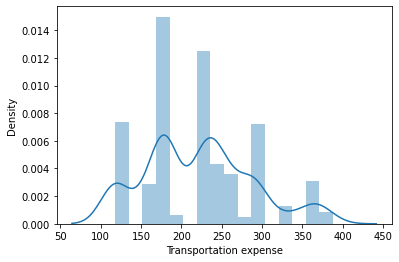

In [248]:
sns.distplot(absent_data['Transportation expense'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


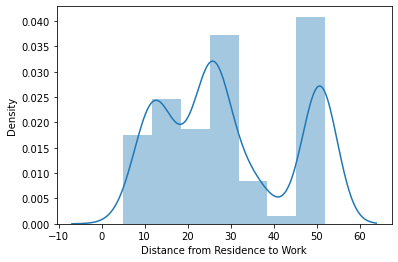

In [249]:
sns.distplot(absent_data['Distance from Residence to Work'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


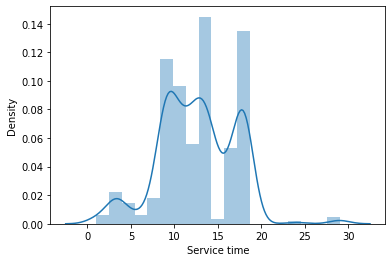

In [250]:
sns.distplot(absent_data['Service time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


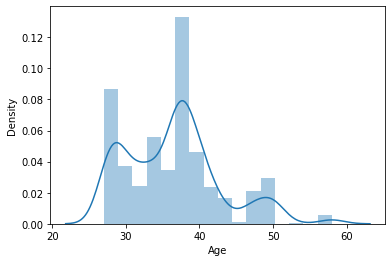

In [251]:
sns.distplot(absent_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


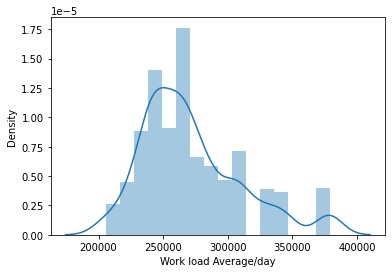

In [252]:
sns.distplot(absent_data['Work load Average/day'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


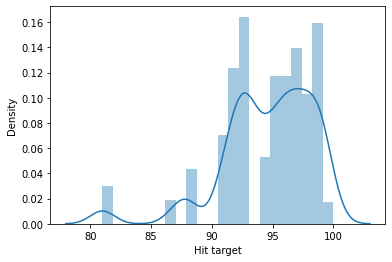

In [255]:
sns.distplot(absent_data['Hit target'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


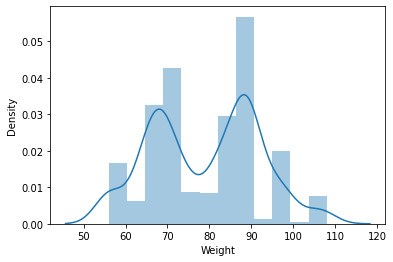

In [256]:
sns.distplot(absent_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


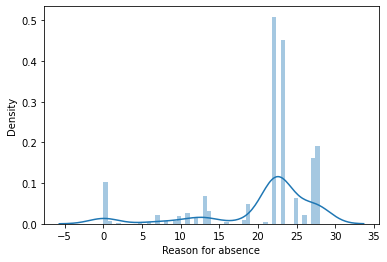

In [260]:
sns.distplot(absent_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


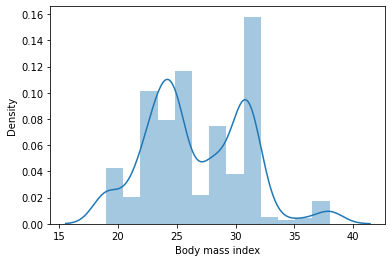

In [259]:
sns.distplot(absent_data['Body mass index'])

We can observe that all continuous variables have skewed distributions